# Case Study: Credit Card Fraud Detection

# Background

### Context

E-commerce and many other online sites have been increasing the usage of the online payment modes, thus increasing the risk for online frauds. It is essential that credit card companies can recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The main aim of this blog is to optimize different machine learning methods to identify fraudulent online credit card transactions.

### Information on dataset

https://www.kaggle.com/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Import Necessary Libraries

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier


#deep learning libraries

# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# TensorFlow Hello World
#import tensorflow as tf
sess = tf.Session()
a = tf.constant(10)
b = tf.constant(32)
print(sess.run(a+b))

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import utils as np_utils
from tensorflow.keras import backend as K



Instructions for updating:
non-resource variables are not supported in the long term
42


## Exploratory Data Analysis

In [2]:
#import data
data= pd.read_csv("creditcard.csv")
data.shape

(284807, 31)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Data Interpretation: The data set has a peculiar data structure, as the data has been anonymized because the company which provides the credit card information will never provide regional information.
If we want to retrieve the original data, we could re-normalize the data using some algorithm provided by the company. However, this is not relevant in this part of the blog as we want to focus on using the provided data to predict the class. 
There are features V1 to V28, amount and time. The features from V1 to V28 seems to be normalized within the same range of values.

In [5]:
#To check for class imbalance
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Data interpretation: The data set is highly imbalanced.

In [6]:
X= data.drop(labels="Class",axis=1)
Y=data['Class']

In [7]:
type(X)

pandas.core.frame.DataFrame

C:\Users\Hwahwa\Anaconda3\envs\PythonCPU\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hwahwa\Anaconda3\envs\PythonCPU\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hwahwa\Anaconda3\envs\PythonCPU\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Hwahwa\A

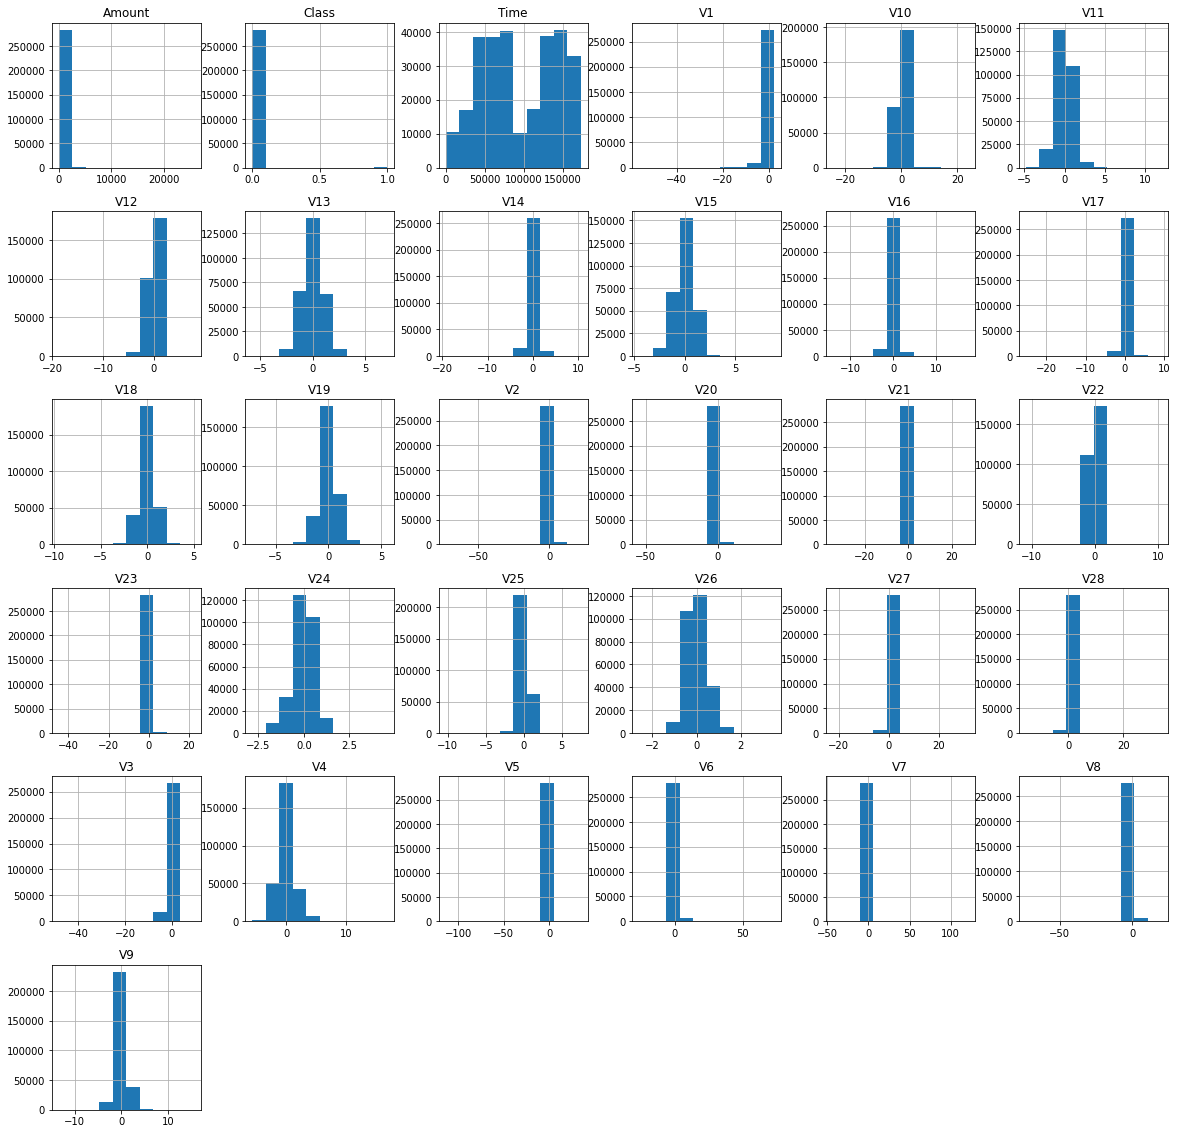

In [8]:
data.hist(figsize=(20,20))
plt.show()

Data interpretation: Most of the data is normally distributed, not skewed. Except for a few features which are skewed: V7, V8. As for now, I will not do any feature enginnering to the features yet.

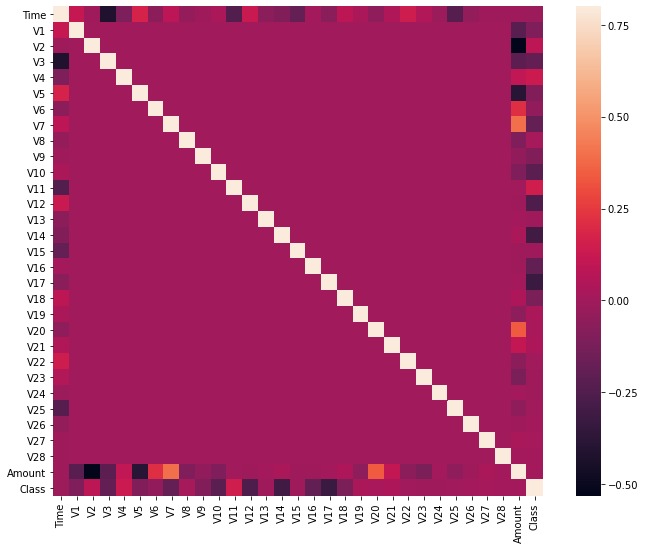

In [9]:
#Plotting the Correlation matrix

corrmat=data.corr()
fig= plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8,square=True)
plt.show()

Data interpretation: The correlation metrics indicate that most of the variables are not correlated.

## Feature Enginnering

In [10]:
#drop the time column because it is not impt in our prediction
#drop the original Amount column as we have normalized the Amount values
SS= StandardScaler()
X['normAmount'] =SS.fit_transform(X['Amount'].values.reshape(-1,1))
X=X.drop(['Time','Amount'],axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [11]:
np.random.seed(10)
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2)

In [12]:
x_train.shape, x_test.shape

((227845, 29), (56962, 29))

# Model Fitting with unbalanced data

## Simple Neural Network

In [13]:
# last we set the units=1 because it is a binary classification: whether the credit card transaction is fraud or not

model = Sequential()
model.add(Dense(units=16,input_dim = 29, activation = 'relu'))
model.add(Dense(units=24, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation = 'relu'))
model.add(Dense(units=24, activation = 'relu'))   
model.add(Dense(units=1, activation = 'sigmoid'))        

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [15]:
model.fit(x_train,y_train,batch_size=15,epochs=5)

Train on 227845 samples
Epoch 1/5
227845/227845 [==============================] - 22s 98us/sample - loss: 0.0077 - acc: 0.9990
Epoch 2/5
227845/227845 [==============================] - 22s 98us/sample - loss: 0.0040 - acc: 0.9993
Epoch 3/5
227845/227845 [==============================] - 22s 98us/sample - loss: 0.0039 - acc: 0.9993
Epoch 4/5
227845/227845 [==============================] - 22s 96us/sample - loss: 0.0040 - acc: 0.9993
Epoch 5/5
227845/227845 [==============================] - 22s 95us/sample - loss: 0.0034 - acc: 0.9993


In [16]:
print(model.evaluate(x_test,y_test))

56962/56962 [==============================] - 1s 19us/sample - loss: 0.0029 - acc: 0.9995
[0.002860970613227019, 0.99947333]


Data interpretation: There is no overfitting for this model because the accuracy for the test set is higher than the training set. However, the model is being trained with a overwhelming unbalanced dataset. Another word is the data is actually being biased towards the majority class.
Another consideration, is when we split the data into train or test set, there might be a possibility that there is no fraud cases in the test set. Therefore, the accuracy of the model for both train and test set is seemingly high. This is a flawed model right now.

In [17]:
# Functionalize model fittting
# Utilize GridSearch to find the optimal parameters



def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    print(pred)
    #pickle.dump(grid_result,open(algo_name,'wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)

# Logistic Regression

In [18]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X,Y,'LogisticRegression_norm',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.0s finished


[0 0 0 ... 0 0 0]
Best Params : {'C': 2.7825594022071245, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.67      0.76        94

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score : 0.9992977774656788
Confusion Matrix : 
 [[56859     9]
 [   31    63]]


Data interpretation: We need to see the precision score for both the classes. We can observe that there is a huge difference between the precision and recall scores between the majority (non-fraud) and the minor class (fraud). The model is giving 100% precision an recall scores on the majority class (non-fraud) while giving a much lower 88% precision on the minor class. It is clearly evident from the classification report that the model is highly biased towards the majority class.

# XgBoost

In [19]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X,Y,'XGBoost_norm',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  5.0min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 11.2min finished


[0 0 0 ... 0 0 0]
Best Params : {'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       1.00      0.82      0.90        94

    accuracy                           1.00     56962
   macro avg       1.00      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score : 0.9997015554229135
Confusion Matrix : 
 [[56868     0]
 [   17    77]]


# Random Forest

In [20]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X,Y,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed: 13.3min remaining: 13.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 46.5min finished


[0 0 0 ... 0 0 0]
Best Params : {'n_estimators': 2000}
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.82      0.90        94

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score : 0.9996839998595555
Confusion Matrix : 
 [[56867     1]
 [   17    77]]


# Balancing the Dataset

## Under Sampling

In [20]:
from imblearn.under_sampling import NearMiss

Using TensorFlow backend.


In [23]:
sm =NearMiss(version=2)
X_res , Y_res = sm.fit_resample(X,Y)
pd.Series(Y_res).value_counts()

1    492
0    492
Name: Class, dtype: int64

In [24]:
X_res.shape, X.shape

((984, 29), (284807, 29))

### Logistics Regression (with balanced data by under sampling)

In [25]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_res,Y_res,'LogisticRegression_US',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s


[0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0]
Best Params : {'C': 7.742636826811269, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.94      0.95      0.94        95

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

Accuracy Score : 0.9441624365482234
Confusion Matrix : 
 [[96  6]
 [ 5 90]]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
C:\Users\Hwahwa\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### XGBOOST (with balanced data by under sampling)

In [26]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_res,Y_res,'XGBoost_US',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.3s remaining:    2.3s


[1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0]
Best Params : {'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       0.96      1.00      0.98        95

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197

Accuracy Score : 0.9796954314720813
Confusion Matrix : 
 [[98  4]
 [ 0 95]]


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.1s finished


### Random Forest (with balanced data by under sampling)

In [27]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X_res,Y_res,'Random Forest_US',RandomForestClassifier(),param,cv=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.9s finished


[0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0]
Best Params : {'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.98      0.99      0.98        95

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197

Accuracy Score : 0.9847715736040609
Confusion Matrix : 
 [[100   2]
 [  1  94]]


Conclusion: After performing data balancing by under sampling method, we have resolve the bias problem faced by the  original model (train with unbalanced data). By comparing the difference in the precision and recall scores between the majority (non-fraud) and the minor class (fraud), there is much smaller difference in the precision score and the recall score between the groups.

### Neural Network (with balanced data by under sampling)

In [28]:
np.random.seed(10)
x_train,x_test,y_train,y_test = train_test_split(X_res,Y_res, test_size = 0.2)
x_train.shape

(787, 29)

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5)

Train on 787 samples
Epoch 1/5
787/787 [==============================] - 0s 316us/sample - loss: 0.4970 - acc: 0.8501
Epoch 2/5
787/787 [==============================] - 0s 104us/sample - loss: 0.2738 - acc: 0.8729
Epoch 3/5
787/787 [==============================] - 0s 109us/sample - loss: 0.2299 - acc: 0.8844
Epoch 4/5
787/787 [==============================] - 0s 108us/sample - loss: 0.2194 - acc: 0.8945
Epoch 5/5
787/787 [==============================] - 0s 97us/sample - loss: 0.1958 - acc: 0.8996


In [30]:
print(model.evaluate(x_test,y_test))

197/197 [==============================] - 0s 431us/sample - loss: 0.1575 - acc: 0.9391
[0.15748350844165396, 0.9390863]
